In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(os.path.abspath(''))))
csv_data_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/csv')
plots_path = os.path.join(BASE_DIR, 'diplomacy_gif_maker/images/plots')

In [5]:
unitChangeCount_df = pd.read_csv(csv_data_path + "/unitChangeCount_full.csv")
unitsByPlayer_df = pd.read_csv(csv_data_path + "/unitsByPlayer_full.csv")
orders_df = pd.read_csv(csv_data_path + "/orders_full.csv")

In [6]:
def get_number_of_seasons(current_year: int, current_season: str):
    number_of_years = current_year - 1901
    base_number = number_of_years*3
    if current_season=="spring":
        number_of_urls = base_number + 1
    elif current_season=="fall":
        number_of_urls = base_number + 2
    else:
        number_of_urls = base_number + 3
    return number_of_urls
num_seasons = get_number_of_seasons(1921, 'fall')

In [7]:
unitsByPlayer_df['unit_type'][17]

'F'

In [8]:
unitsByPlayer_df.unit_type.replace(["{'type': 'F', 'coast': 'sc'}", "{'type': 'F', 'coast': 'nc'}"], ['F', 'F'], inplace=True)

In [9]:
unitsByPlayer_df.to_csv(csv_data_path + "/unitsByPlayer_full.csv")

In [10]:
country_year_df = pd.DataFrame(unitsByPlayer_df.groupby(['country']).year.value_counts())
country_season_df = pd.DataFrame(unitsByPlayer_df.groupby(['country', 'year', 'season_number']).season.value_counts())

In [11]:
country_season_df

season
country year season_number season        
Austria 1901 1             spring       3
             2             fall         3
             3             winter       3
        1902 4             spring       5
             5             fall         5
...                                   ...
Turkey  1920 59            fall        14
             60            winter      14
        1921 61            spring      15
             62            fall        15
             63            winter      15

[334 rows x 1 columns]

In [12]:
country_year_df.index = country_year_df.index.rename(['country', 'years'])
country_season_df.index = country_season_df.index.rename(['country', 'year', 'season_number', 'seasons'])

In [13]:
country_year_df_sorted = country_year_df.sort_values(by=['country', 'years'])
country_season_df_sorted = country_season_df.sort_values(by=['country', 'year'])
country_year_df_sorted = country_year_df_sorted.reset_index(level=[0,1])
country_season_df_sorted = country_season_df_sorted.reset_index(level=[0,1,2,3])
country_year_df_sorted.columns = ['country', 'year', 'units']
country_season_df_sorted.columns = ['country', 'year', 'season_number','season', 'units']

In [14]:
country_season_df_sorted

,country,year,season_number,season,units
0,Austria,1901,1,spring,3
1,Austria,1901,2,fall,3
2,Austria,1901,3,winter,3
3,Austria,1902,4,spring,5
4,Austria,1902,5,fall,5
...,...,...,...,...,...
329,Turkey,1920,59,fall,14
330,Turkey,1920,60,winter,14
331,Turkey,1921,61,spring,15
332,Turkey,1921,62,fall,15


In [15]:
country_year_df_sorted.to_csv(csv_data_path + "/temp/country_year_df.csv")
country_season_df_sorted.to_csv(csv_data_path + "/temp/country_season_units_df.csv")

In [16]:
total_years = max(unitsByPlayer_df['year'])

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [18]:
palette={
      'Austria':(0.941176470588,0.0,0.0), 
      'England':(0.0,0.0,0.66667),
      'France':(.6,.6,1.0),
      'Germany':(0.0,0.0,0.0),
      'Italy':(0.0,0.66667,0.0),
      'Russia':(0.733333333333,0.0,0.733333333333),
      'Turkey':(0.733333333333,0.733333333333,0.0),
    }

In [19]:
print(country_season_df_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        334 non-null    object
 1   year           334 non-null    int64 
 2   season_number  334 non-null    int64 
 3   season         334 non-null    object
 4   units          334 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.2+ KB
None


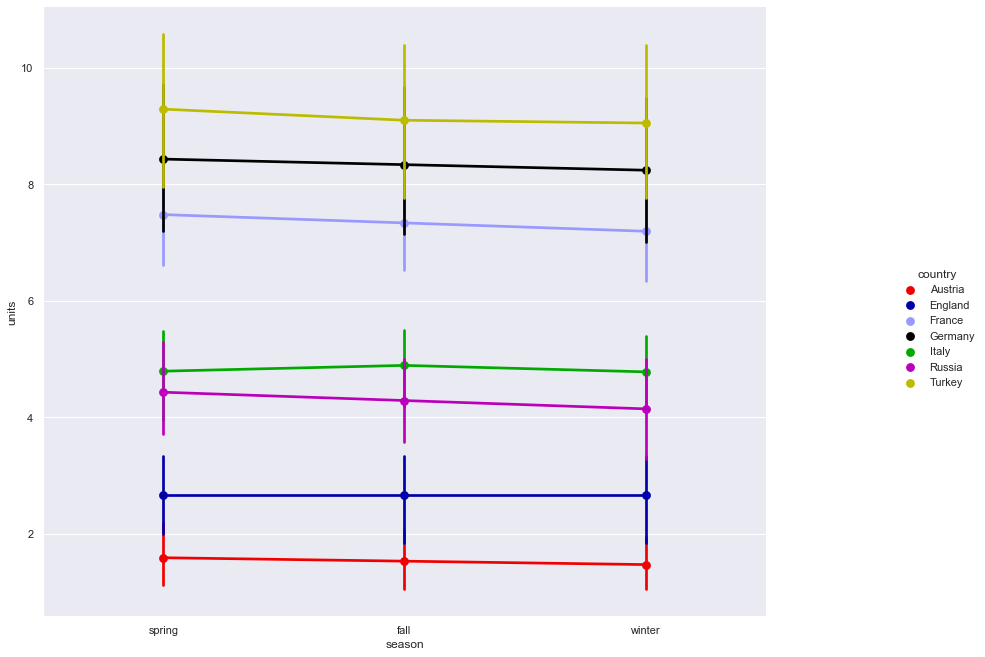

In [20]:
# plt.figure(figsize=(200, 6))
# plt.subplots(figsize=(20,15))
g=sns.catplot(x="season", y="units", hue="country", kind="point", data=country_season_df_sorted, palette=palette)
g.fig.set_size_inches(15,10)

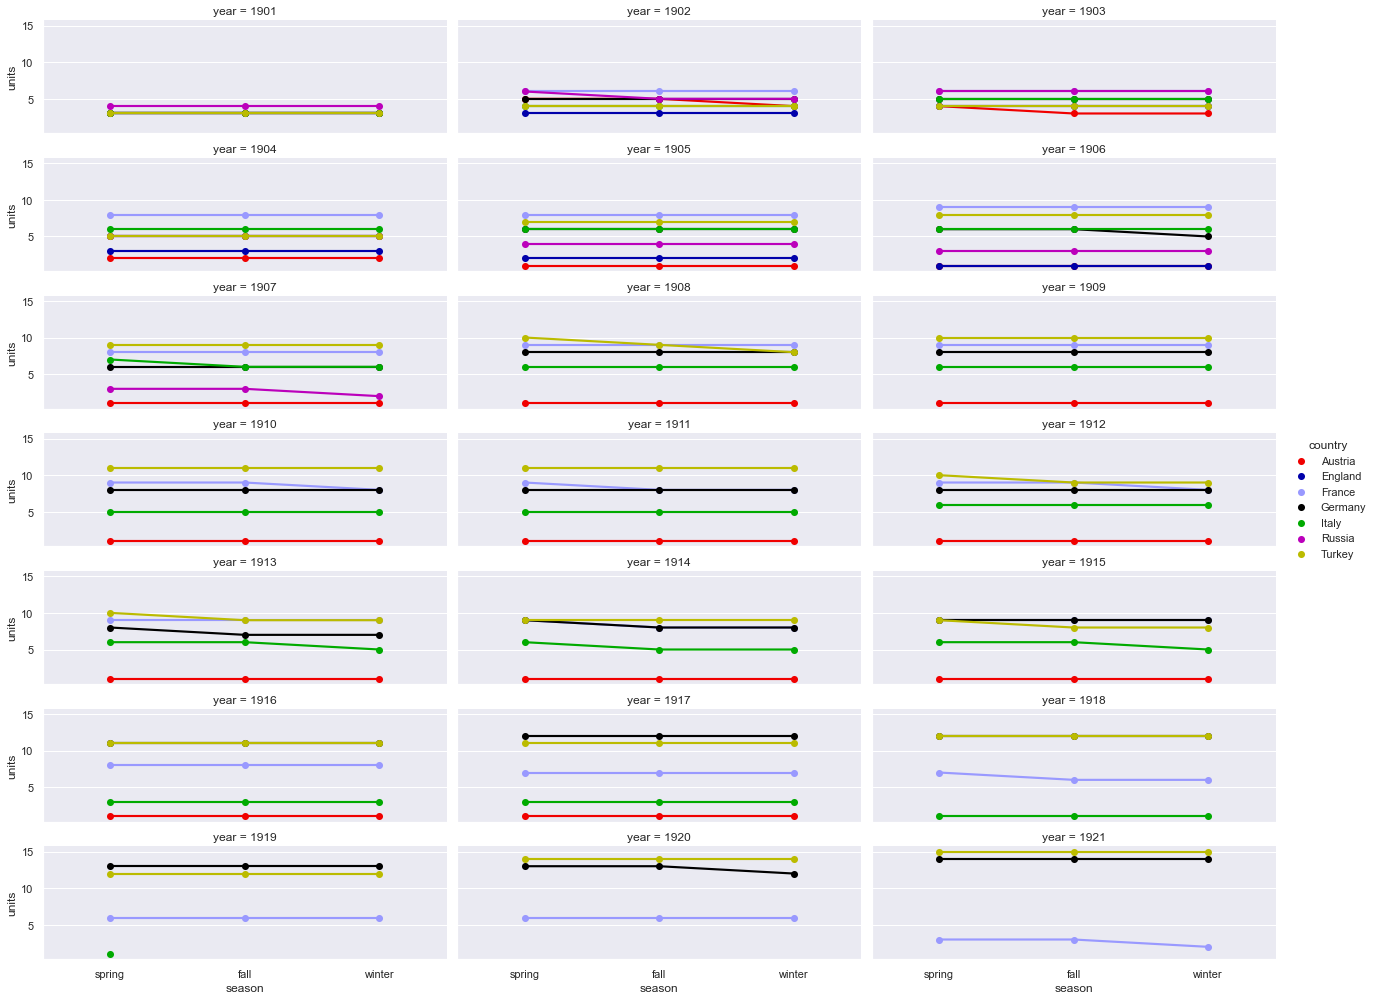

In [21]:
units_by_year_plot = sns.catplot(x="season", y="units", hue="country", order=['spring', 'fall', 'winter'], col="year",
               col_wrap=3, height=2, aspect=3, scale=.8,
               data=country_season_df_sorted, kind="point", palette=palette)
units_by_year_fig = units_by_year_plot.savefig(plots_path + "/unitsByYear.png")
# units_by_year_fig.savefig(plots_path + "/unitsByYear.png")

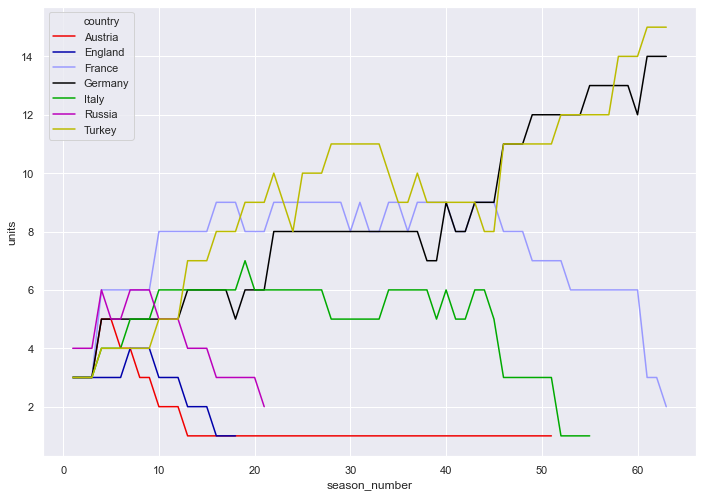

In [22]:
sns_plot = sns.lineplot(x="season_number", y="units", hue="country", 
                  data=country_season_df_sorted, palette=palette)
fig = sns_plot.get_figure()
fig.savefig(plots_path + "/unitsByCountry.png")

In [23]:
# Metrics
# territories taken - territories taken from
# foreign territories supported - territories supported by foreign players
# most sedentary (when an army didn’t move) - most mobile
# sea master (most fleets) - (most armies) - (most convoys?)
# first to 10 SCs?
# 12:16
# most builds, most disbands

In [24]:
orders_df

,Unnamed: 0,country,type,unitFrom_list,unitTo_list,result_list,result_reason_list,year,season,season_number
0,0,Turkey,MOVE,Ank,BLA,FAILS,Attack strength is not greater than the preven...,1901,spring,1
1,1,Turkey,MOVE,Smy,Lon,FAILS,Invalid move path,1901,spring,1
2,2,Turkey,MOVE,Con,Bul,SUCCEEDS,Attack strength is greater,1901,spring,1
3,3,Italy,HOLD,Ven,ION,SUCCEEDS,Unchallenged,1901,spring,1
4,4,Italy,MOVE,Nap,Apu,SUCCEEDS,Attack strength is greater,1901,spring,1
...,...,...,...,...,...,...,...,...,...,...
994,994,Germany,SUPPORT,ENG,Pru,SUCCEEDS,Unchallenged,1921,fall,62
995,995,Germany,SUPPORT,Bur,Boh,FAILS,Disrupted,1921,fall,62
996,996,Germany,SUPPORT,Gas,Nwy,SUCCEEDS,Unchallenged,1921,fall,62
997,997,Germany,SUPPORT,Nwy,Bur,FAILS,Disrupted,1921,fall,62


In [26]:
country_order_results = pd.DataFrame(orders_df.groupby(['country']).result_list.value_counts())

In [33]:
country_order_results

result_list
country result_list             
Austria SUCCEEDS              33
        FAILS                 19
England SUCCEEDS              12
        FAILS                  8
France  SUCCEEDS              84
        FAILS                 33
Germany SUCCEEDS             192
        FAILS                 88
Italy   SUCCEEDS              81
        FAILS                 58
Russia  SUCCEEDS               3
        FAILS                  2
Turkey  SUCCEEDS             300
        FAILS                 86

In [37]:
country_order_results.index = country_order_results.index.rename(['country', 'result'])
country_order_results_reset = country_order_results.reset_index(level=[0,1])

In [43]:
def results_ratio(country_order_results_reset):
    success_ratio_list = []
    failure_ratio_list = []
    country_list = []
    for i, row in country_order_results_reset.iterrows():
        if i%2==0:
            country_list.append(row['country'])
            success = row['result_list']
        
        if i%2==1:
            failure = row['result_list']
        
        if i>0:
            success_ratio_list.append(success/(success + failure))
            failure_ratio_list.append(failure/(success + failure))
    data_tuples = list(zip(country_list, success_ratio_list, failure_ratio_list))
    df = pd.DataFrame(data_tuples, columns=['country', 'success_ratio', 'failure_ratio'])    
    return df

In [44]:
results_ratio(country_order_results_reset)

,country,success_ratio,failure_ratio
0,Austria,0.634615,0.365385
1,England,0.387097,0.612903
2,France,0.600000,0.400000
3,Germany,0.913043,0.086957
4,Italy,0.717949,0.282051
5,Russia,0.853333,0.146667
6,Turkey,0.685714,0.314286


In [ ]:
unitChangeCount_df